In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv('/content/drive/MyDrive/new/Copy of train.csv')
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [3]:
df.isnull()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.shape

(45211, 11)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [8]:
df.drop_duplicates()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [9]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [10]:
df.education_qual.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [11]:
df.education_qual = df.education_qual.replace('unknown', np.nan)


In [12]:
df.isnull().sum()

age                  0
job                  0
marital              0
education_qual    1857
call_type            0
day                  0
mon                  0
dur                  0
num_calls            0
prev_outcome         0
y                    0
dtype: int64

In [13]:
df.education_qual = df.education_qual.fillna('secondary')

In [14]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [15]:
df.groupby(by='marital').size()

marital
divorced     5207
married     27214
single      12790
dtype: int64

<Axes: >

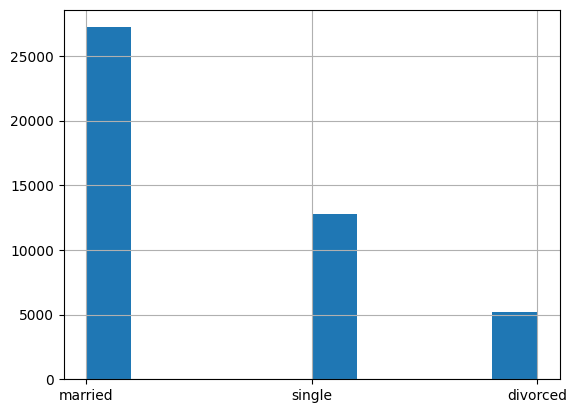

In [16]:
df["marital"].hist(bins=10)

In [17]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [18]:
df['target'] = df['y'].map({'yes':1, 'no':0})

In [19]:
(df.groupby("job")['target'].mean()*100).sort_values()

job
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
services          8.883004
technician       11.056996
unknown          11.805556
self-employed    11.842939
admin.           12.202669
management       13.755551
unemployed       15.502686
retired          22.791519
student          28.678038
Name: target, dtype: float64

<Axes: xlabel='job'>

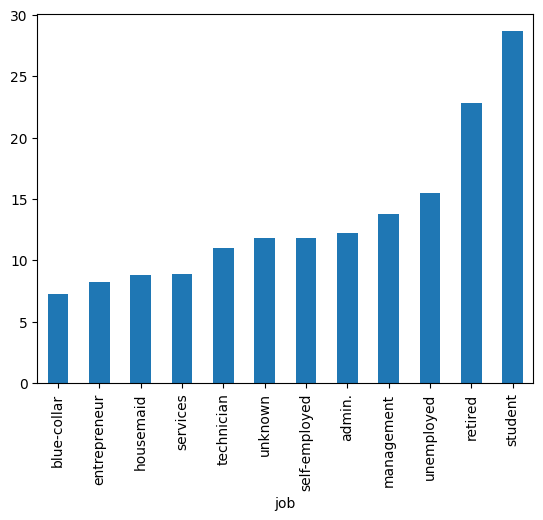

In [20]:
(df.groupby("job")['target'].mean()*100).sort_values().plot(kind='bar')

<Axes: xlabel='marital'>

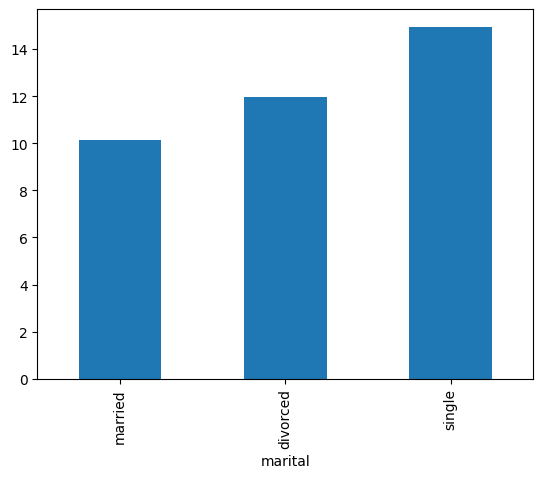

In [21]:
(df.groupby("marital")['target'].mean()*100).sort_values().plot(kind='bar')

<Axes: xlabel='education_qual'>

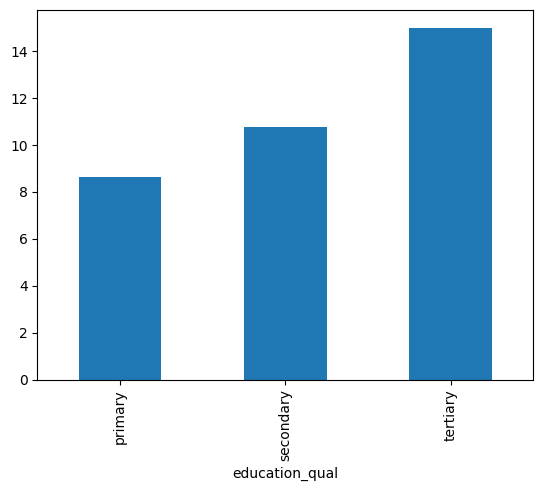

In [22]:
(df.groupby("education_qual")['target'].mean()*100).sort_values().plot(kind='bar')

<Axes: xlabel='call_type'>

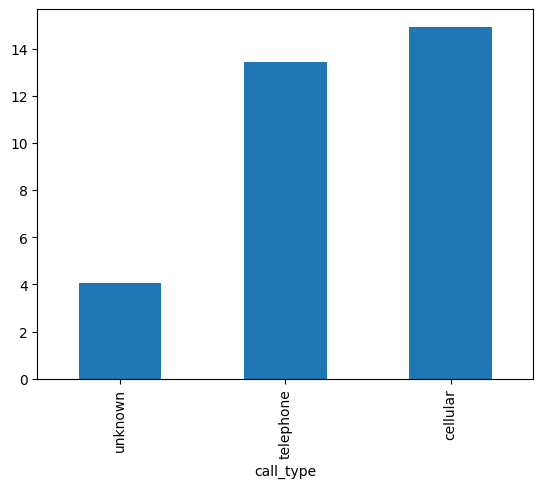

In [23]:
(df.groupby("call_type")['target'].mean()*100).sort_values().plot(kind='bar')

<Axes: xlabel='mon'>

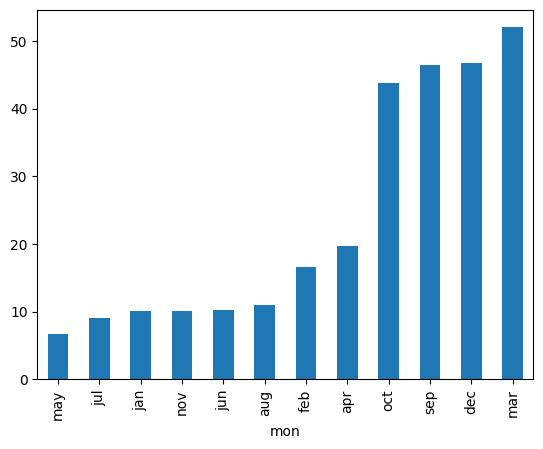

In [24]:
(df.groupby("mon")['target'].mean()*100).sort_values().plot(kind='bar')

<Axes: xlabel='prev_outcome'>

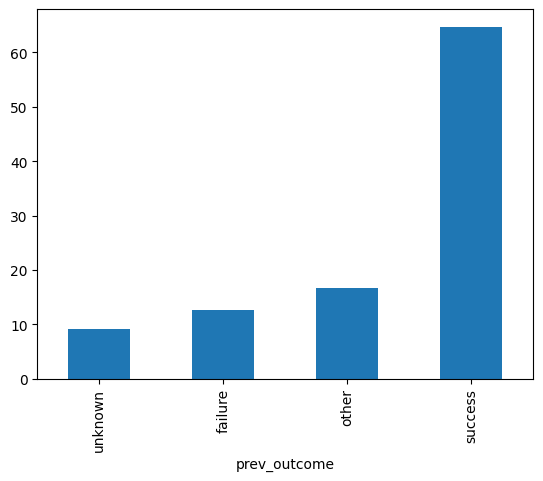

In [25]:
(df.groupby("prev_outcome")['target'].mean()*100).sort_values().plot(kind='bar')

<ipython-input-26-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

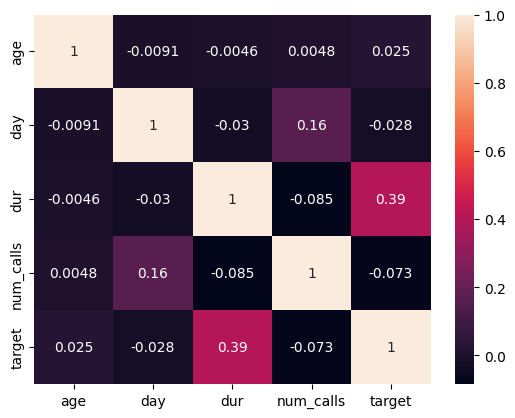

In [26]:
sns.heatmap(df.corr(),annot=True)

In [27]:
x=df[['age', 'job', 'marital', 'education_qual','call_type','day', 'mon',
       'dur', 'num_calls', 'prev_outcome']].values
x[:9]

array([[58, 'management', 'married', 'tertiary', 'unknown', 5, 'may',
        261, 1, 'unknown'],
       [44, 'technician', 'single', 'secondary', 'unknown', 5, 'may',
        151, 1, 'unknown'],
       [33, 'entrepreneur', 'married', 'secondary', 'unknown', 5, 'may',
        76, 1, 'unknown'],
       [47, 'blue-collar', 'married', 'secondary', 'unknown', 5, 'may',
        92, 1, 'unknown'],
       [33, 'unknown', 'single', 'secondary', 'unknown', 5, 'may', 198,
        1, 'unknown'],
       [35, 'management', 'married', 'tertiary', 'unknown', 5, 'may',
        139, 1, 'unknown'],
       [28, 'management', 'single', 'tertiary', 'unknown', 5, 'may', 217,
        1, 'unknown'],
       [42, 'entrepreneur', 'divorced', 'tertiary', 'unknown', 5, 'may',
        380, 1, 'unknown'],
       [58, 'retired', 'married', 'primary', 'unknown', 5, 'may', 50, 1,
        'unknown']], dtype=object)

In [28]:
df['education_qual'].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [29]:
df = pd.get_dummies(df, columns=['job','marital','education_qual','call_type','mon','prev_outcome'])

In [30]:
df.y = df.y.map({'no': 0,'yes': 1})


In [31]:
df.y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [32]:
y=df['target'].values
y[:5]


array([0, 0, 0, 0, 0])

In [33]:
yes_count = df['target'].value_counts()
yes_count

0    39922
1     5289
Name: target, dtype: int64

<Axes: ylabel='y'>

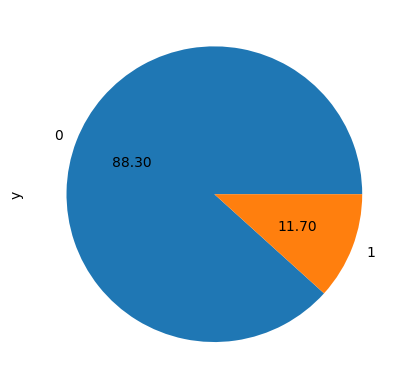

In [34]:
df.y.value_counts().plot.pie(autopct='%.2f')

In [35]:
df = df.rename(columns= ({'job_admin.':'job_admin'}))


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       45211 non-null  int64
 1   day                       45211 non-null  int64
 2   dur                       45211 non-null  int64
 3   num_calls                 45211 non-null  int64
 4   y                         45211 non-null  int64
 5   target                    45211 non-null  int64
 6   job_admin                 45211 non-null  uint8
 7   job_blue-collar           45211 non-null  uint8
 8   job_entrepreneur          45211 non-null  uint8
 9   job_housemaid             45211 non-null  uint8
 10  job_management            45211 non-null  uint8
 11  job_retired               45211 non-null  uint8
 12  job_self-employed         45211 non-null  uint8
 13  job_services              45211 non-null  uint8
 14  job_student               45211 non-nu

In [37]:
df1=df.drop('target',axis=1,inplace=True)
df

,age,day,dur,num_calls,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,5,261,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,44,5,151,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,5,76,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,5,92,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33,5,198,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,17,977,3,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,17,456,2,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,17,1127,5,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,17,508,4,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [38]:
X=df.drop('y',axis=1)
y=df['y']

# **spliting**

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split (X,y, test_size=40, random_state=5)

In [40]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((45171, 41), (45171,), (40, 41), (40,))

In [41]:
X.shape,y.shape

((45211, 41), (45211,))

#scaling

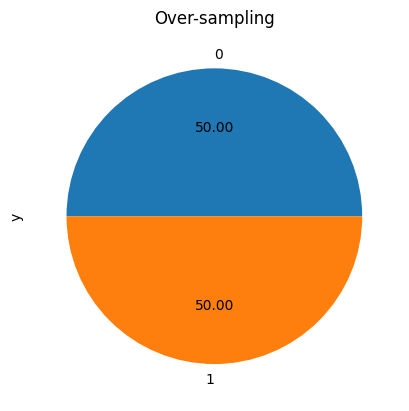

In [42]:
from imblearn.over_sampling import RandomOverSampler


ros = RandomOverSampler(sampling_strategy=1)
ros = RandomOverSampler(sampling_strategy="not majority")
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)


ax = y_train_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [43]:
yes_count=y_train_ros.value_counts()
yes_count

0    39886
1    39886
Name: y, dtype: int64

In [44]:
#standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled1 = scaler.fit_transform(X_train)
#df_scaled2 = scaler.fit_transform(x_test)
df_scaled1

array([[ 1.04206609,  1.34510219, -0.12089056, ..., -0.20600914,
        -0.18596946,  0.47252979],
       [ 0.85372868,  1.58540645,  0.76839471, ..., -0.20600914,
        -0.18596946,  0.47252979],
       [ 1.6070783 , -1.29824469, -0.79270869, ..., -0.20600914,
        -0.18596946,  0.47252979],
       ...,
       [ 1.6070783 , -0.45717978, -0.57524155, ..., -0.20600914,
        -0.18596946,  0.47252979],
       [-1.40632016,  1.82571071, -0.94804236, ..., -0.20600914,
        -0.18596946,  0.47252979],
       [ 1.701247  , -0.9377883 , -0.75775861, ..., -0.20600914,
        -0.18596946, -2.11626867]])

## **LogisticRegression**

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lg=LogisticRegression()

In [47]:
lg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,confusion_matrix

In [52]:
predicted=lg.predict(X_test)
conf = confusion_matrix(y_test, predicted)

print()
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print ("The aurroc_auc_score of Logistic Regression is : ", roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1]))
log_reg_y_pred_prob = lg.predict_proba(X_test)[:, 1]
log_reg_auc = roc_auc_score(y_test, log_reg_y_pred_prob)



The accuracy of Logistic Regression is :  92.5 %
The aurroc_auc_score of Logistic Regression is :  0.9097222222222222


## KNeighborsClassifier

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [54]:
X_train,X_test,y_train,y_test=train_test_split (X,y, test_size=40, random_state=5)
print('train set:', X_train.shape, y_train.shape)
print('test set:',X_test.shape, y_test.shape)

train set: (45171, 41) (45171,)
test set: (40, 41) (40,)


In [55]:
k=4
model=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
model

KNeighborsClassifier(n_neighbors=4)

In [69]:
predicted=model.predict(X_test)
conf = confusion_matrix(y_test, predicted)

print()
print()
print ("The accuracy of KNeighborsClassifier is : ", accuracy_score(y_test, predicted)*100, "%")
print ("The aurroc_auc_score of KNeighborsClassifier is : ", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
knn_y_pred_prob = model.predict_proba(X_test)[:, 1]
knn_auc = roc_auc_score(y_test, knn_y_pred_prob)



The accuracy of KNeighborsClassifier is :  92.5 %
The aurroc_auc_score of KNeighborsClassifier is :  0.9618055555555556


## Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [59]:
ped=model.predict(X_test)
ped

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [60]:
predicted=model.predict(X_test)
conf = confusion_matrix(y_test, predicted)


print ("The accuracy of DecisionTreeClassifier is : ", accuracy_score(y_test, predicted)*100, "%")
print ("The aurroc_auc_score of DecisionTreeClassifier is : ", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
DT_y_pred_prob = model.predict_proba(X_test)[:, 1]
DT_auc = roc_auc_score(y_test, DT_y_pred_prob)

The accuracy of DecisionTreeClassifier is :  92.5 %
The aurroc_auc_score of DecisionTreeClassifier is :  0.9618055555555556


## RandomForest

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

In [62]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [63]:
y_pred = rfc.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [73]:
from sklearn.metrics import accuracy_score,roc_auc_score


print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(roc_auc_score(y_test, y_pred)))
print ("The aurroc_auc_score of  random forest is : ", roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1]))
rf_y_pred_prob = rfc.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred_prob)
rf_auc = roc_auc_score(y_test, rf_y_pred_prob)

Model accuracy score with 10 decision-trees : 0.7361
The aurroc_auc_score of  random forest is :  0.96875


**xgboost**

In [67]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
model_xgb = xgb.XGBClassifier(n_estimators=100, verbosity = 0)
model_xgb.fit(X_train,y_train)
model_xgb.score(X_test, y_test)
print( " Train score : ", model_xgb.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model_xgb, X_train, y_train)))
print ("The aurroc_auc_score of Gradient Boosting is : ", roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1]))
xgb_y_pred_prob = model_xgb.predict_proba(X_test)[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_y_pred_prob)

 Train score :  0.9430608133537004  Cross-Val score :  0.9073519909230565
The aurroc_auc_score of Gradient Boosting is :  0.9652777777777777


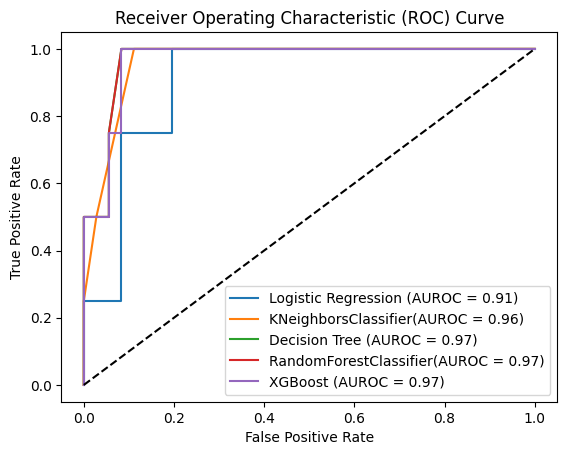

In [74]:
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_y_pred_prob)
knn_fpr,knn_tpr,_= roc_curve(y_test, knn_y_pred_prob)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_y_pred_prob)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_pred_prob)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred_prob)

# Plot ROC curves
plt.plot(log_reg_fpr, log_reg_tpr, label=f'Logistic Regression (AUROC = {log_reg_auc:.2f})')
plt.plot(knn_fpr,knn_tpr,label=f'KNeighborsClassifier(AUROC = {knn_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUROC = {dt_auc:.2f})')
plt.plot(rf_fpr, rf_tpr,label =f'RandomForestClassifier(AUROC = {rf_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUROC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **Cross-validation**

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score,train_test_split,KFold

In [ ]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('KN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))

In [ ]:

results=dict()
for name,model in models:
    kfold=KFold(n_splits=10,random_state=None,)
    cv_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results[name]=(cv_results.mean(),cv_results.std())

print("name  results.mean  results.std")
for key,value in results.items():
  print(key,value)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

name  results.mean  results.std
LR (0.9007769184007335, 0.0036434642133846497)
KN (0.8812068431069953, 0.0028917795550961792)
DT (0.876380802522329, 0.0023276176820074108)
RF (0.9051159149592074, 0.004380632973880992)


In [ ]:
best_model=DecisionTreeClassifier

In [ ]:
import pickle
data={'models':model}
# Load the saved model from the pickle file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(data,file)
    #loaded_model = pickle.load(file)


In [ ]:
with open('best_model.pkl', 'rb') as file:
  data=pickle.load(file)